In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow_examples.models.pix2pix import pix2pix
import matplotlib.pyplot as plt

In [48]:
import os
import numpy as np
import skimage
from skimage import data, draw
from skimage import transform, util
import cv2
data_path = '../../../Downloads/Segmentation/'

image_rows = 224
image_cols = 224

n_channel = 3

In [49]:
def preprocess(imgs):
    imgs_p = np.ndarray((imgs.shape[0], img_rows, img_cols, 1), dtype=np.uint8)
    for i in range(imgs.shape[0]):
        resized_image = cv2.resize(imgs[i], (img_cols, img_rows), interpolation=cv2.INTER_CUBIC)
        imgs_p[i] = resized_image.reshape(resized_image.shape + (1,))
    return imgs_p

def create_train_data():
#     train_data_path = os.path.join(data_path, 'train/')
#     images = sorted(os.listdir(train_data_path))
#     total = len(images)
#     imgs = np.ndarray((total, image_rows, image_cols, n_channel), dtype=np.uint8)

#     print('-'*30)
#     print('Creating train images...')
#     print('-'*30)
        
#     i = 0
#     for image_name in images:
#         img = cv2.imread(os.path.join(train_data_path, image_name))
# #         gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# #         resized_image = cv2.resize(gray_image, (image_cols, image_rows))
# #         resized_image = resized_image.reshape(resized_image.shape + (1,))
#         img = np.array(resized_image)
#         imgs[i] = img
#         print('Done: {0}/{1} images'.format(i, total))
#         i += 1
#     print('Loading done.')

#     np.save('../assets/imgs_train.npy', imgs)
#     print('Saving to .npy files done.')

    train_data_path = os.path.join(data_path, 'train/')
    images = sorted(os.listdir(train_data_path))
    total = len(images)
    imgs = np.ndarray((total, image_rows, image_cols, n_channel), dtype=np.uint8)

    print('-'*30)
    print('Creating train images...')
    print('-'*30)

    i = 0
    for image_name in images:
        img = cv2.imread(os.path.join(train_data_path, image_name))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB).astype(np.float32)
        img = cv2.resize(img, (image_cols, image_rows))
        img = np.array(img)
        imgs[i] = img
        print('Done: {0}/{1} images'.format(i, total))
        i += 1
    print('Loading done.')
    
    np.save('../assets/imgs_train.npy', imgs)
    print('Saving to .npy files done.')

def create_train_masks_data():
#     train_masks_data_path = os.path.join(data_path, 'train_masks/')
#     images = sorted(os.listdir(train_masks_data_path))
#     total = len(images)

#     imgs = np.ndarray((total, image_rows, image_cols, 3), dtype=np.uint8)

#     i = 0
#     print('-'*30)
#     print('Creating train masks images...')
#     print('-'*30)
#     for image_name in images:
# #         print(image_name)
#         # Read RGB image
#         img = cv2.imread(os.path.join(train_masks_data_path, image_name))

#         # Convert to grayscale
#         gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#         # Rescale to image_rows x image_cols size
#         resized_image = cv2.resize(gray_image, (image_cols, image_rows))
#         resized_image = resized_image.reshape(resized_image.shape + (1,))
#         img = np.array(resized_image)

#         img = np.array([img])

#         imgs[i] = img

#         print('Done: {0}/{1} images'.format(i, total))
#         i += 1
#     print('Loading done.')

    train_masks_data_path = os.path.join(data_path, 'train_masks/')
    images = sorted(os.listdir(train_masks_data_path))
    total = len(images)

    img_masks = np.ndarray((total, image_rows, image_cols), dtype=np.uint8)

    i = 0
    print('-'*30)
    print('Creating train masks images...')
    print('-'*30)
    for image_name in images:
        img_mask = cv2.imread(os.path.join(train_masks_data_path, image_name), cv2.IMREAD_GRAYSCALE)
        _, img_mask = cv2.threshold(img_mask, 127, 255, cv2.THRESH_BINARY)

        # Rescale to image_rows x image_cols size
        img_mask = cv2.resize(img_mask, (image_cols, image_rows))
        img_mask = np.array(img_mask)
        img_mask = np.array(img_mask)
        img_masks[i] = img_mask

        print('Done: {0}/{1} images'.format(i, total))
        i += 1

#     print(np.shape(img_masks))

    np.save('../assets/imgs_mask_train.npy', img_masks)
    print('Saving to .npy files done.')    

def load_train_data():
    imgs_train = np.load('../assets/imgs_train.npy')
    imgs_mask_train = np.load('../assets/imgs_mask_train.npy')
    return imgs_train, imgs_mask_train

create_train_data()
create_train_masks_data()

------------------------------
Creating train images...
------------------------------
Done: 0/3 images
Done: 1/3 images
Done: 2/3 images
Loading done.
Saving to .npy files done.
------------------------------
Creating train masks images...
------------------------------
Done: 0/3 images
Done: 1/3 images
Done: 2/3 images
Saving to .npy files done.


In [50]:
from sklearn.model_selection import train_test_split
# from keras import backend as K
import tensorflow.keras.backend as K

img_rows = 224 
img_cols = 224

# def dice_coef(y_true, y_pred):
#     y_true_f = K.flatten(y_true)
#     y_pred_f = K.flatten(y_pred)a
#     intersection = K.sum(y_true_f * y_pred_f)
#     return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)


# def dice_coef_loss(y_true, y_pred):
#     return -dice_coef(y_true, y_pred)

# def preprocess(imgs):
#     imgs_p = np.ndarray((imgs.shape[0], img_rows, img_cols, ), dtype=np.uint8)
#     for i in range(imgs.shape[0]):
#         resized_image = cv2.resize(imgs[i], (img_cols, img_rows), interpolation=cv2.INTER_CUBIC)
# #         imgs_p[i] = resized_image.reshape(resized_image.shape + (1,))
#         imgs_p[i] = resized_image
#     return imgs_p


train, mask = load_train_data()
# train = preprocess(train)
# mask = preprocess(mask)

train = train.astype('float32')
mean = np.mean(train)  # mean for data centering
std = np.std(train)  # std for data normalization

train -= mean
train /= std

mask = mask.astype('float32')
mask /= 255.  # scale masks to [0, 1]

X_train, X_test, y_train, y_test = train_test_split(train, mask, test_size=0.2, random_state=42)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


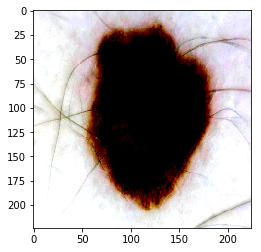

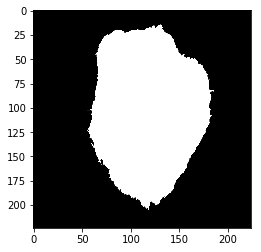

In [52]:
import random

img_index = random.randint(0, len(X_train) - 1)

plt.imshow(X_train[img_index])
plt.show()

plt.imshow(y_train[img_index], cmap='gray')
plt.show()

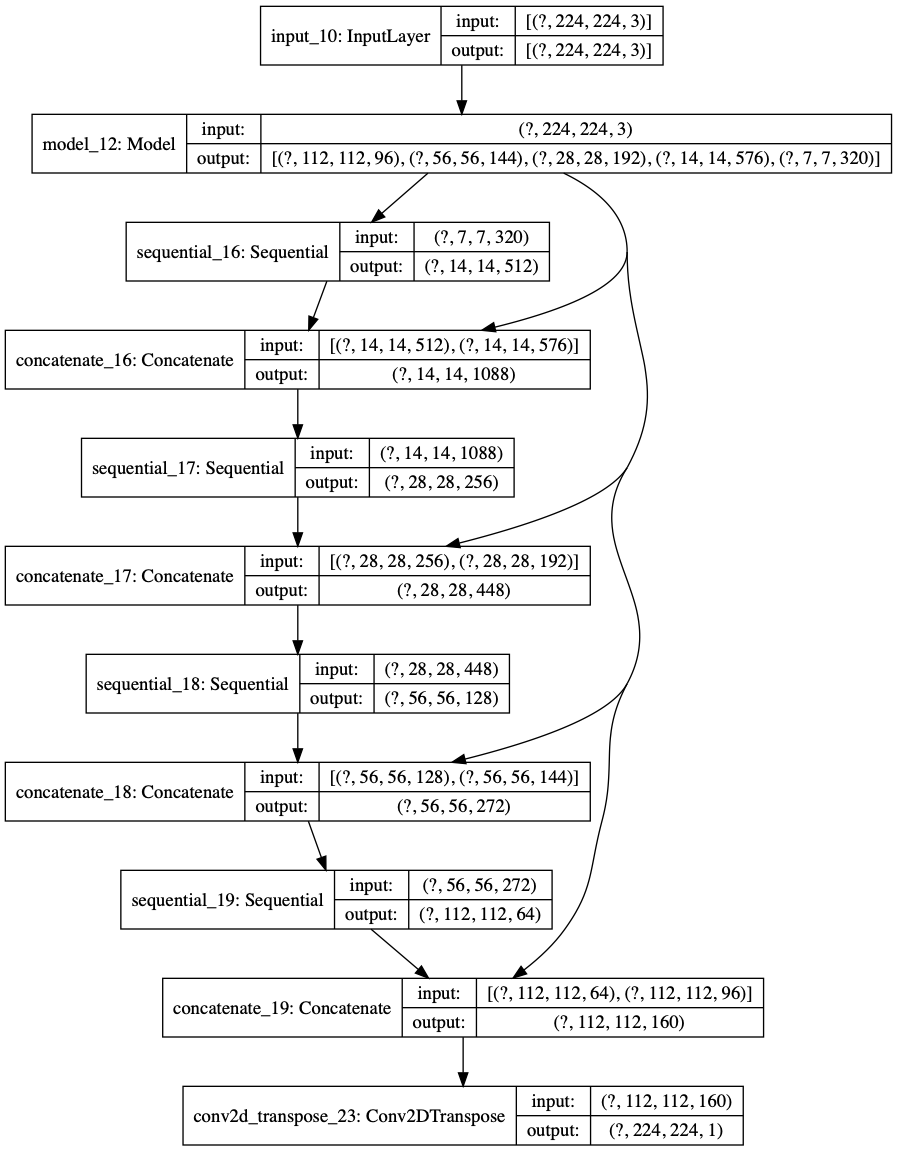

In [58]:
import cv2
import numpy as np
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Convolution2D, MaxPooling2D, UpSampling2D, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Dense, Dropout

filepath = "../assets/mobilenetv2_model.h5"
OUTPUT_CHANNELS = 1
IMG_SHAPE = (224, 224, 3)

def unet_model(output_channels):

    # Create the base model from the pre-trained model MobileNet V2
    mobilev2 = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE, weights='imagenet', include_top=False)
    x = mobilev2.layers[-2].output
    predictions = Dense(7, activation='softmax')(x)
    base_model = Model(inputs=mobilev2.input, outputs=predictions)
    base_model.load_weights(filepath)

    # Use the activations of these layers
    layer_names = [
        'block_1_expand_relu',   # 64x64
        'block_3_expand_relu',   # 32x32
        'block_6_expand_relu',   # 16x16
        'block_13_expand_relu',  # 8x8
        'block_16_project',      # 4x4
    ]
    layers = [base_model.get_layer(name).output for name in layer_names]

    # Create the feature extraction model
    down_stack = tf.keras.Model(inputs=base_model.input, outputs=layers)
    down_stack.trainable = False

    up_stack = [
        pix2pix.upsample(512, 3),  # 4x4 -> 8x8
        pix2pix.upsample(256, 3),  # 8x8 -> 16x16
        pix2pix.upsample(128, 3),  # 16x16 -> 32x32
        pix2pix.upsample(64, 3),   # 32x32 -> 64x64
    ]

    inputs = tf.keras.layers.Input(shape=IMG_SHAPE)
    x = inputs

    # Downsampling through the model
    skips = down_stack(x)
    x = skips[-1]
    skips = reversed(skips[:-1])

    # Upsampling and establishing the skip connections
    for up, skip in zip(up_stack, skips):
        x = up(x)
        concat = tf.keras.layers.Concatenate()
        x = concat([x, skip])

    # This is the last layer of the model
    last = tf.keras.layers.Conv2DTranspose(
        filters=1,
        kernel_size=3,
        strides=2,
        padding='same')  #64x64 -> 128x128

    x = last(x)

    return tf.keras.Model(inputs=inputs, outputs=x)

model = unet_model(OUTPUT_CHANNELS)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
tf.keras.utils.plot_model(model, show_shapes=True)

In [84]:
import cv2
import numpy as np
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Convolution2D, MaxPooling2D, UpSampling2D, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape
from tensorflow.keras.layers import GaussianNoise

def get_unet():
#     concat_axis = 3
    
#     inputs = Input(shape=[img_rows, img_cols, 1])
#     conv1 = Convolution2D(32, (3, 3), activation='relu', padding='same')(inputs)
#     conv1 = Convolution2D(32, (3, 3), activation='relu', padding='same')(conv1)
#     pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

#     conv2 = Convolution2D(64, (3, 3), activation='relu', padding='same')(pool1)
#     conv2 = Convolution2D(64, (3, 3), activation='relu', padding='same')(conv2)
#     pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

#     conv3 = Convolution2D(128, (3, 3), activation='relu', padding='same')(pool2)
#     conv3 = Convolution2D(128, (3, 3), activation='relu', padding='same')(conv3)
#     pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

#     conv4 = Convolution2D(256, (3, 3), activation='relu', padding='same')(pool3)
#     conv4 = Convolution2D(256, (3, 3), activation='relu', padding='same')(conv4)
#     pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

#     conv5 = Convolution2D(512, (3, 3), activation='relu', padding='same')(pool4)
#     conv5 = Convolution2D(512, (3, 3), activation='relu', padding='same')(conv5)

# #     up6 = merge([UpSampling2D(size=(2, 2))(conv5), conv4], mode='concat', concat_axis=1)
#     up6 = Concatenate(axis=concat_axis)([UpSampling2D(size=(2, 2))(conv5), conv4])
#     conv6 = Convolution2D(256, (3, 3), activation='relu', padding='same')(up6)
#     conv6 = Convolution2D(256, (3, 3), activation='relu', padding='same')(conv6)

# #     up7 = merge([UpSampling2D(size=(2, 2))(conv6), conv3], mode='concat', concat_axis=1)
#     up7 = Concatenate(axis=concat_axis)([UpSampling2D(size=(2, 2))(conv6), conv3])
#     conv7 = Convolution2D(128, (3, 3), activation='relu', padding='same')(up7)
#     conv7 = Convolution2D(128, (3, 3), activation='relu', padding='same')(conv7)

# #     up8 = merge([UpSampling2D(size=(2, 2))(conv7), conv2], mode='concat', concat_axis=1)
#     up8 = Concatenate(axis=concat_axis)([UpSampling2D(size=(2, 2))(conv7), conv2])
#     conv8 = Convolution2D(64, (3, 3), activation='relu', padding='same')(up8)
#     conv8 = Convolution2D(64, (3, 3), activation='relu', padding='same')(conv8)

# #     up9 = merge([UpSampling2D(size=(2, 2))(conv8), conv1], mode='concat', concat_axis=1)
#     up9 = Concatenate(axis=concat_axis)([UpSampling2D(size=(2, 2))(conv8), conv1])
#     conv9 = Convolution2D(32, (3, 3), activation='relu', padding='same')(up9)
#     conv9 = Convolution2D(32, (3, 3), activation='relu', padding='same')(conv9)

#     conv10 = Convolution2D(1, (1, 1), activation='sigmoid')(conv9)

#     model = Model(inputs=inputs, outputs=conv10)
    filter_size = 5
    filter_size_2 = 11
    dropout_a = 0.5
    dropout_b = 0.5
    dropout_c = 0.5
    gaussian_noise_std = 0.025
    channels = 3
    fc_size = 8192
    concat_axis = 3

    inputs = Input((img_rows, img_cols, channels))
    input_with_noise = GaussianNoise(gaussian_noise_std)(inputs)

    conv1 = Convolution2D(32, (filter_size, filter_size), activation='relu', padding='same')(input_with_noise)
    conv1 = Convolution2D(32, (filter_size, filter_size), activation='relu', padding='same')(conv1)
    conv1 = Convolution2D(32, (filter_size, filter_size), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D((2, 2), strides=(2, 2))(conv1)
    pool1 = GaussianNoise(gaussian_noise_std)(pool1)

    conv2 = Convolution2D(64, (filter_size, filter_size), activation='relu', padding='same')(pool1)
    conv2 = Convolution2D(64, (filter_size, filter_size), activation='relu', padding='same')(conv2)
    conv2 = Convolution2D(64, (filter_size, filter_size), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D((2, 2), strides=(2, 2))(conv2)
    pool2 = GaussianNoise(gaussian_noise_std)(pool2)

    conv3 = Convolution2D(128, (filter_size, filter_size), activation='relu', padding='same')(pool2)
    conv3 = Convolution2D(128, (filter_size, filter_size), activation='relu', padding='same')(conv3)
    conv3 = Convolution2D(128, (filter_size, filter_size), activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D((2, 2), strides=(2, 2))(conv3)
    pool3 = Dropout(dropout_a)(pool3)

    fc = Flatten()(pool3)
    fc = Dense(fc_size, activation='relu')(fc)
    fc = Dropout(dropout_b)(fc)

    n = img_rows // 8
    fc = Dense(128*n*n, activation='relu')(fc)
    fc = GaussianNoise(gaussian_noise_std)(fc)
    fc = Reshape((128,n,n))(fc)

#     up1 = merge([UpSampling2D(size=(2, 2))(fc), conv3], mode='concat', concat_axis=1)
    up1 = Concatenate(axis=1)([UpSampling2D(size=(2, 2))(fc), conv3])
    up1 = Dropout(dropout_c)(up1)

    conv4 = Convolution2D(128, (filter_size_2, filter_size_2), activation='relu', padding='same')(up1)
    conv4 = Convolution2D(128, (filter_size, filter_size), activation='relu', padding='same')(conv4)
    conv4 = Convolution2D(64, (filter_size, filter_size), activation='relu', padding='same')(conv4)

#     up2 = merge([UpSampling2D(size=(2, 2))(conv4), conv2], mode='concat', concat_axis=1)
    up2 = Concatenate(axis=concat_axis)([UpSampling2D(size=(2, 2))(conv4), conv2])
    up2 = Dropout(dropout_c)(up2)

    conv5 = Convolution2D(64, (filter_size_2, filter_size_2), activation='relu', padding='same')(up2)
    conv5 = Convolution2D(64, (filter_size, filter_size), activation='relu', padding='same')(conv5)
    conv5 = Convolution2D(32, (filter_size, filter_size), activation='relu', padding='same')(conv5)

#     up3 = merge([UpSampling2D(size=(2, 2))(conv5), conv1], mode='concat', concat_axis=1)
    up3 = Concatenate(axis=concat_axis)([UpSampling2D(size=(2, 2))(conv5), conv1])
    up3 = Dropout(dropout_c)(up3)

    conv6 = Convolution2D(32, (filter_size_2, filter_size_2), activation='relu', padding='same')(up3)
    conv6 = Convolution2D(32, (filter_size, filter_size), activation='relu', padding='same')(conv6)
    conv6 = Convolution2D(32, (filter_size, filter_size), activation='relu', padding='same')(conv6)

    conv7 = Convolution2D(1, 1, 1, activation='sigmoid')(conv6)

    model = Model(input=inputs, output=conv7)

    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

    return model

model = get_unet()

model.compile(optimizer=Adam(lr=1e-4), 
              loss='binary_crossentropy', 
              metrics=['accuracy', 
                       tf.keras.metrics.MeanIoU(num_classes=2, name='MeanIoU')])

checkpoint = ModelCheckpoint(filepath='unet.hdf5', 
                             monitor='val_MeanIoU', 
                             verbose=1, 
                             save_best_only=True, 
                             mode='max')

reduce_lr = ReduceLROnPlateau(monitor='val_MeanIoU', factor=0.5, patience=2, 
                                   verbose=1, mode='max', min_lr=0.00001)

callbacks_list = [checkpoint, reduce_lr]

history = model.fit(X_train,
                    y_train,
#                     batch_size=8,
                    batch_size=1,
                    validation_data=(X_test, y_test),
#                     validation_steps=8,
                    validation_steps=1,
                    epochs=30, 
                    verbose=1,
                    callbacks=callbacks_list)

ValueError: A `Concatenate` layer requires inputs with matching shapes except for the concat axis. Got inputs shapes: [(None, 256, 56, 28), (None, 56, 56, 128)]

In [61]:
model = unet_model(OUTPUT_CHANNELS)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# model.compile(optimizer=Adam(lr=1e-4), 
#               loss='binary_crossentropy', 
#               metrics=['accuracy', 
#                        tf.keras.metrics.MeanIoU(num_classes=2, name='MeanIoU')])

# checkpoint = ModelCheckpoint(filepath='unet.hdf5', 
#                              monitor='val_MeanIoU', 
#                              verbose=1, 
#                              save_best_only=True, 
#                              mode='max')

# reduce_lr = ReduceLROnPlateau(monitor='val_MeanIoU', factor=0.5, patience=2, 
#                                    verbose=1, mode='max', min_lr=0.00001)

# callbacks_list = [checkpoint, reduce_lr]

history = model.fit(X_train,
                    y_train,
#                     batch_size=8,
                    batch_size=1,
                    validation_data=(X_test, y_test),
#                     validation_steps=8,
                    validation_steps=1,
                    epochs=30, 
                    verbose=1)

Train on 2 samples, validate on 1 samples
Epoch 1/30
1/2 [==============>...............] - ETA: 0s

ValueError: Shape mismatch: The shape of labels (received (50176,)) should equal the shape of logits except for the last dimension (received (224, 224)).

In [63]:
np.shape(X_train)

(2, 224, 224, 3)

In [ ]:
# print('-'*30)
# print('Loading and preprocessing test data...')
# print('-'*30)
# imgs_test, imgs_id_test = load_test_data()
# imgs_test = load_test_data()
# imgs_test = preprocess(imgs_test)

# imgs_test = imgs_test.astype('float32')
# imgs_test -= mean
# imgs_test /= std
model = get_unet()
model.load_weights('unet.hdf5')
imgs_mask_test = model.predict(X_test)

In [ ]:
img_index = random.randint(0, len(X_test))

plt.imshow(imgs_mask_test[img_index].reshape(img_rows, img_cols), cmap='gray')
plt.show()

plt.imshow(y_test[img_index].reshape(img_rows, img_cols), cmap='gray')
plt.show()

# plt.imshow(imgs_mask_test)

In [ ]:
test_data_path = os.path.join(data_path, 'test/')
images = sorted(os.listdir(test_data_path))
total = len(images)
raw_imgs = []
imgs = np.ndarray((total, image_rows, image_cols, 1), dtype=np.uint8)

i = 0
print('-'*30)
print('Creating test images...')
print('-'*30)
for image_name in images:
    # Read RGB image
    img = cv2.imread(os.path.join(test_data_path, image_name))
    raw_imgs.append(img)
    # Convert to grayscale
    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Rescale to image_rows x image_cols size
    resized_image = cv2.resize(gray_image, (image_cols, image_rows))
    resized_image = resized_image.reshape(resized_image.shape + (1,))
    img = np.array(resized_image)
    imgs[i] = img
    print('Done: {0}/{1} images'.format(i, total))
    i += 1
print('Loading done.')

np.save('imgs_test.npy', imgs)
print('Saving to .npy files done.')

In [ ]:
imgs_test = np.load('imgs_test.npy')

test = preprocess(imgs_test)
test = test.astype('float32')
mean = np.mean(test)  # mean for data centering
std = np.std(test)  # std for data normalization

test -= mean
test /= std

In [ ]:
model = get_unet()
model.load_weights('unet.hdf5')
prediction = model.predict(test)

In [ ]:
img_index = random.randint(0, len(test))

plt.imshow(cv2.cvtColor(raw_imgs[img_index], cv2.COLOR_BGR2RGB))
plt.show()

# plt.imshow(test[img_index].reshape(img_rows, img_cols), cmap='gray')
# plt.show()

# plt.imshow(prediction[img_index].reshape(img_rows, img_cols), cmap='gray')
# plt.show()

img = cv2.resize(cv2.cvtColor(raw_imgs[img_index], cv2.COLOR_BGR2RGB), (240, 192))
mask = cv2.inRange(cv2.cvtColor(prediction[img_index], cv2.COLOR_GRAY2RGB),
                   (0.9, 0.9, 0.9),
                   (1, 1, 1))

# Create a blank 300x300 black image
red = np.zeros((192, 240, 3), np.uint8)
# Fill image with red color(set each pixel to red)
red[:] = (0, 50, 0)

plt.imshow(img + cv2.bitwise_and(red, red, mask=mask))

In [ ]:
## mask = (prediction[img_index].reshape(img_rows, img_cols) > 9e-1)
c = cv2.cvtColor(raw_imgs[img_index], cv2.COLOR_BGR2RGB)
img= cv2.resize(img, (240, 192))

print(np.shape(img))
kk = cv2.cvtColor(prediction[img_index], cv2.COLOR_GRAY2RGB)
print(np.shape(kk))
mask = cv2.inRange(kk, (0.9, 0.9, 0.9), (1, 1, 1))

plt.imshow(cv2.bitwise_and(img, img, mask=mask))
plt.show()
plt.imshow(img)
plt.show()

In [ ]:
kk

In [ ]:
plt.imshow((prediction[0].reshape(img_rows, img_cols) > 0.01) & (prediction[0].reshape(img_rows, img_cols) < 0.8))
plt.show()

plt.imshow(prediction[0].reshape(img_rows, img_cols), cmap='gray')
plt.show()